In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import mylibrary.nnlib as tnn
import splinelib as tsp

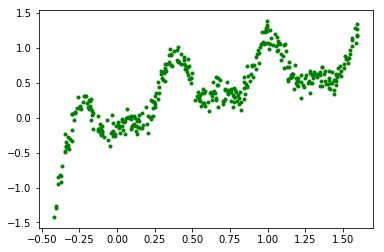

In [2]:
x = np.linspace(0,2,400)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
y = (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise
x = x - 0.4 #x.mean() # good practice to zero-center x in linear mapping
xx = x.reshape(-1,1)
yy = y.reshape(-1,1)
plt.scatter(x, y, marker='.', color='g')

In [40]:
## rough has been done for other testing purpose,, clean before rerunning
max_points = 10
lr=0.03
spline = tsp.Spline1D(max_points, x, y)

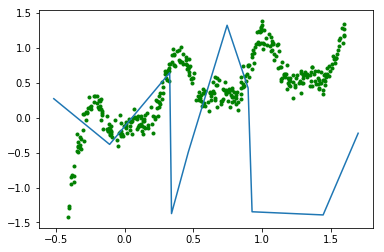

In [41]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.plot(spline.X, spline.Y)

_______________________
Steps 0
Error 1.8257581542819432


_______________________
Steps 100
Error 0.3905563818412932


_______________________
Steps 200
Error 0.43574780744355673


_______________________
Steps 300
Error 0.5163984286462179


_______________________
Steps 400
Error 0.42083260181337023


_______________________
Steps 500
Error 0.45182384483803184


_______________________
Steps 600
Error 0.45818146449420927


_______________________
Steps 700
Error 0.4403236018621188


_______________________
Steps 800
Error 0.4386872289711178


_______________________
Steps 900
Error 0.4496388716031753


_______________________
Steps 1000
Error 0.44279136252450696


_______________________
Steps 1100
Error 0.43895410461458373


_______________________
Steps 1200
Error 0.4469080426275781


_______________________
Steps 1300
Error 0.43863281084948996


_______________________
Steps 1400
Error 0.4489986755385388


_______________________
Steps 1500
Error 0.4424616214512092


_____________

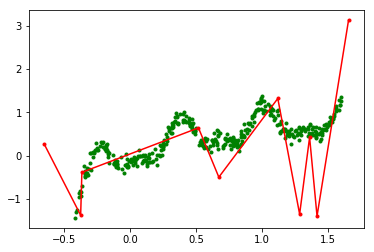

In [42]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ion()
fig.show()
fig.canvas.draw()

for step in range(10000):

#     Y = spline.forward(x) + x
    Y = spline.forward(x)
    
    dy = Y-y
#     dx = spline.backward(dy) + dy
    dx = spline.backward(dy)
    spline.del_Y=spline.del_Y*0.
    spline.update(lr)
    
#     if step % 100 == 0:
#         spline._remove_close_points_()
#         spline._combine_linear_points_()
#         spline._remove_no_input_points_()
#         spline._add_new_point_()
        
    if step % 100 == 0:            
        error = (dy**2).mean()
        print('_______________________')
        print("Steps", step)
        print("Error", error)
        
        ax.clear()
        plt.scatter(x, y, marker='.', color='g')
#         plt.plot(spline.X, spline.Y+spline.X, marker='.', color='r')
        plt.plot(spline.X, spline.Y, marker='.', color='r')
#         plt.scatter(x, dx, marker='.', color='c')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            plt.pause(50)
            break

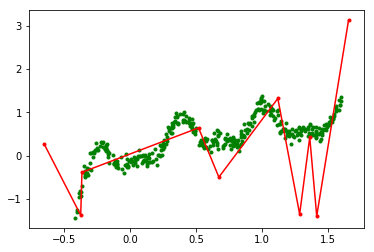

In [43]:
plt.scatter(x, y, marker='.', color='g')
plt.plot(spline.X, spline.Y, marker='.', color='r')

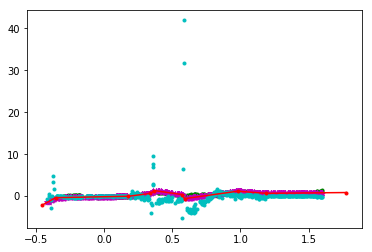

In [29]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.plot(spline.X, spline.Y, marker='.', color='r')
# Y = spline.forward(x) + x
Y = spline.forward(x)
plt.scatter(x, Y, marker='*', color='m')
plt.scatter(x, dx, marker='.', color='c')

In [8]:
def reverse0(self:tsp.Spline1D, y):
    x = np.zeros_like(self.input)
    for i in range(self.n_points-1):
        xpossible = self.diffX[i]/self.diffY[i] *(y - self.Y[i]) + self.X[i]
        x += xpossible*self.rangeX[i]
    return x

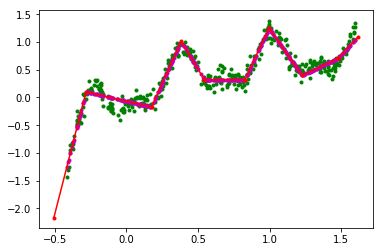

In [9]:
X = reverse0(spline, Y)
plt.scatter(x, y, marker='.', color='g')
plt.plot(spline.X, spline.Y, marker='.', color='r')
plt.scatter(X,Y, marker='.', color='m')

## Reversing the actual target value of y

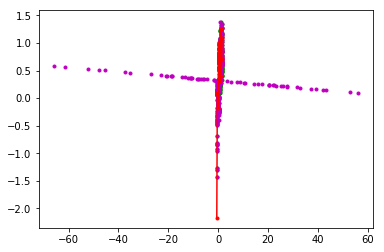

In [10]:
X = reverse0(spline, y)
plt.scatter(x, y, marker='.', color='g')
plt.plot(spline.X, spline.Y, marker='.', color='r')
plt.scatter(X,y, marker='.', color='m')

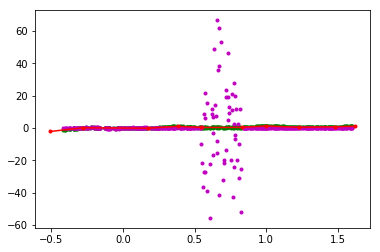

In [11]:
dX = x - X
plt.scatter(x, y, marker='.', color='g')
plt.plot(spline.X, spline.Y, marker='.', color='r')
plt.scatter(x,dX, marker='.', color='m')

## Reversing without prior knowledge of distribution

In [12]:
def _calculate_rangeY_(self:tsp.Spline1D, y):
    rangeY = np.zeros((self.n_points-1, y.shape[0]))
    def _inrange2_(X, break0, break1): #if x is after
        xmsk1 = X >= break0
        xmsk2 = X < break1
        xmsk12 = np.bitwise_and(xmsk1, xmsk2)
        xmsk3 = X < break0
        xmsk4 = X >= break1
        xmsk34 = np.bitwise_and(xmsk3, xmsk4)
        xs = np.bitwise_or(xmsk12, xmsk34)
        return xs

    for i in range(self.n_points-1):
        if self.n_points-2 == 0:
            rangeY[i] = _inrange2_(y, -np.inf, np.inf)
        elif i==0:
            sign = -1 if self.Y[0]<self.Y[1] else 1
            rangeY[i] = _inrange2_(y, sign*np.inf, self.Y[1])
        elif i== self.n_points-2:
            sign = 1 if self.Y[i]<self.Y[i+1] else -1
            rangeY[i] = _inrange2_(y, self.Y[i], sign*np.inf)
        else:
            rangeY[i] = _inrange2_(y, self.Y[i], self.Y[i+1])
#         rangeY[i] = _inrange2_(y, self.Y[i], self.Y[i+1])
    return rangeY

In [13]:
rangeY = _calculate_rangeY_(spline, Y)
rangeY, rangeY.shape

(array([[1., 1., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 1., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 1., 1.]]), (9, 400))

In [14]:
rangeY.sum(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 3., 1., 3., 3., 1., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       1., 3., 1., 3., 1., 3., 1., 1., 3., 1., 1., 1., 5., 1., 3., 5., 5.,
       1., 3., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 3., 5., 3., 5., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3.

In [15]:
def reverse1(self:tsp.Spline1D, y, rangeY=None):
    if rangeY is None:
        rangeY = _calculate_rangeY_(self, y)
        
    x = np.zeros_like(self.rangeX)
    for i in range(self.n_points-1):
        xpossible = self.diffX[i]/self.diffY[i] *(y - self.Y[i]) + self.X[i]
        x[i] = xpossible*rangeY[i]
    return x

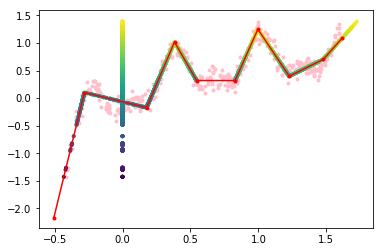

In [16]:
X = reverse1(spline, y)
plt.scatter(x, y, marker='.', color='pink')
plt.plot(spline.X, spline.Y, marker='.', color='r')
for Xi in X:
    plt.scatter(Xi,y, marker='.', c=y)

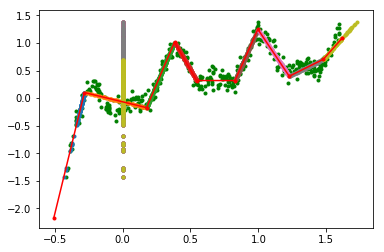

In [17]:
X = reverse1(spline, y)
plt.scatter(x, y, marker='.', color='g')
plt.plot(spline.X, spline.Y, marker='.', color='r')
for Xi in X:
    plt.scatter(Xi,y, marker='.')

## Sampling from possible multinoulli distribution

In [18]:
rangeY.shape

(9, 400)

In [19]:
def draw_sample_rangeY(rangeY):
    num_category = rangeY.shape[0]
    num_inputs = rangeY.shape[1]
    rangeY_sampled = np.zeros_like(rangeY)
    for i in range(num_inputs):
        elemRange = rangeY[:,i]
        non_zero_indx = np.nonzero(elemRange)[0]
        sample_nz_indx = np.random.randint(low=0, high=len(non_zero_indx))
        select_nz_indx = non_zero_indx[sample_nz_indx]
#         print(select_nz_indx, elemRange)
        rangeY_sampled[select_nz_indx,i] = 1.
    return rangeY_sampled

In [20]:
rangeY_sampled = draw_sample_rangeY(rangeY)
rangeY_sampled.shape, rangeY.shape

((9, 400), (9, 400))

In [21]:
rangeY_sampled.sum(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [22]:
def reverse2(self:tsp.Spline1D, y, rangeY=None):
    if rangeY is None:
        rangeY = _calculate_rangeY_(self, y)
    rangeY_sampled = draw_sample_rangeY(rangeY)
        
    x = np.zeros_like(y)
    for i in range(self.n_points-1):
        xpossible = self.diffX[i]/self.diffY[i] *(y - self.Y[i]) + self.X[i]
        x += xpossible*rangeY_sampled[i]
    return x

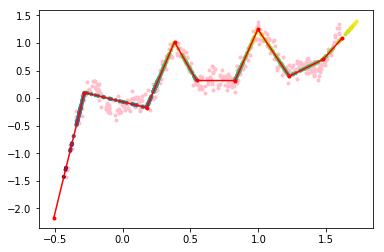

In [23]:
X = reverse2(spline, y)
plt.scatter(x, y, marker='.', color='pink')
plt.plot(spline.X, spline.Y, marker='.', color='r')
plt.scatter(X,y, marker='.', c=y)

In [24]:
np.array(y.tolist()*4).shape

(1600,)

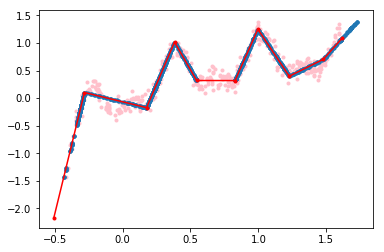

In [25]:
Y = np.array(y.tolist()*4)
X = reverse2(spline, Y)
plt.scatter(x, y, marker='.', color='pink')
plt.plot(spline.X, spline.Y, marker='.', color='r')
plt.scatter(X,Y, marker='.')